# Coding Tutorial 8 - Natural Language Processing

```
Course: CSCI 5922 Spring 2025, University of Colorado Boulder
TA: Everley Tseng
Email: Yu-Yun.Tseng@colorado.edu
* AI assistant is used in making this tutorial
```

## Overview

Sections:
- NLP libraries
- Tokenization and pre-processing: word, subword, and character
- Word embeddings


Objectives:
- Know what NLP libraries are available
- Learn how to perform standard text processing steps in NLP
- Learn how to tokenize text data on word, subword, and character levels
- Learn to load pre-trained word embeddings


## NLP Libraries

Common NLP libraries include rule-based processing and deep learning models (embeddings or other tasks). Below, we list some libraries that can be helpful for NLP tasks:

- Rule-based text processing: [NLTK](https://www.nltk.org/) and [spaCy](https://spacy.io/usage/spacy-101)
- Embeddings and models: [Gensim](https://radimrehurek.com/gensim/auto_examples/index.html) and [Hugging face transformers](https://huggingface.co/docs/transformers/en/index)

### NLTK and spaCy

Both **NLTK (Natural Language Toolkit)** and **spaCy** are widely used for NLP tasks, but they have different strengths. This guide compares them and helps you choose the right tool.


| Feature | **NLTK** | **spaCy** |
|---------|---------|---------|
| **Speed** | Slow | Fast (Cython-optimized) |
| **Ease of Use** | More complex API | Intuitive & modern API |
| **Pre-trained Models** | Requires manual setup | Pre-trained models (`en_core_web_sm`, etc.) |
| **Text Processing Tools** | Extensive (stemming, parsing, etc.) | More efficient |
| **Stopwords Support** | Yes (`nltk.corpus.stopwords`) |  Yes (built-in `is_stop`) |
| **Named Entity Recognition (NER)** | Requires training | Pre-trained & efficient |
| **Deep Learning Integration** | Not optimized for DL models | Better integration with PyTorch, TensorFlow |
| **Lemmatization** | Yes (`WordNetLemmatizer`) | Yes (`token.lemma_`, faster) |

**When to Choose NLTK?**
- Custom NLP pipelines for specialized tasks
- Linguistics-based NLP research

**When to Choose spaCy?**
- Need faster NLP processing (pre-trained models)
- Deep learning integration (e.g., PyTorch, TensorFlow)
- Industry-ready NLP applications (e.g., chatbots)


As spaCy integrates with our applications better, we will be using it for this course. However, if you are interested in liguistics oriented NLP, NLTK offers greater flexibility for customization (as discussed in NLTK's [tutorial](https://www.nltk.org/book/ch01.html)).

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


### Gensim and Hugging Face

Both Gensim and Hugging Face provide pre-trained embedding models. Gensim is a more traditional library built for unsupervised topic modeling and word embeddings, and Hugging Face was founded to make state-of-the-art NLP models accessible.


| Feature | **Gensim** | **Hugging Face** |
|---------|---------|---------|
| **Model Type** | Word2Vec, FastText, etc. | BERT, GPT, T5, etc. |
| **Handles out-of-vocabulary (OOV)** | No | Yes |
| **Best for** | Word similarity, topic modeling | Deep learning NLP tasks |

We will be using both in this course. In this tutorial, we will focus on the `Word2Vec` embeddings in Gensim, and the Hugging Face library `transformers` will be introduced in future tutorials.



In [ ]:
import gensim

## Tokenization

### Word-Based Tokenization

Word tokenization splits text into words based on spaces and punctuation. Common practices to clean up the text data for word-based tokenization includes converting all charaters to lower-case, removing stop words, and stemming/lemmatization.

#### Lowercase Texts

In [ ]:
import re

text = 'Hello, World! Deep Learning is so much fun. Keep your codes running!!'
cleaned_text = text.lower()  # Lowercase
cleaned_text = re.sub(r'\W+', ' ', cleaned_text)  # Remove punctuation (if needed)

print(cleaned_text)

hello world deep learning is so much fun keep your codes running 


#### Tokenize Words

In [ ]:
doc = nlp(cleaned_text)
tokens = [token for token in doc]
print([token.text for token in tokens])

['hello', 'world', 'deep', 'learning', 'is', 'so', 'much', 'fun', 'keep', 'your', 'codes', 'running']


#### Remove Stop Words

In [ ]:
filtered_tokens = [token for token in tokens if not token.is_stop]
print([token.text for token in filtered_tokens])

['hello', 'world', 'deep', 'learning', 'fun', 'codes', 'running']


#### Stemming/Lemmatization

In [ ]:
lemmas = [token.lemma_ for token in filtered_tokens if not token.is_stop]
print(lemmas)

['hello', 'world', 'deep', 'learning', 'fun', 'code', 'run']


Question: Why is ***running*** lemmatized into ***run***, but ***learning*** is still ***learning***?

Answer: ***Running*** is a verb in the sentence, so the lemma of the verb is ***run***. However, ***learning*** is used as a noun in the sentence, and so the lemma of this noun is ***learning*** rather than the verb ***learn***.

### Subword Tokenization (Byte-Pair Encoding)

Byte Pair Encoding (BPE) helps handle rare words and unknown tokens. It is commonly used in BERT, GPT, and other transformer models that we will cover. Instead of treating entire words as individual tokens, subword tokenization breaks words into frequently occurring subword units. This allows the model to handle rare and unseen words efficiently while still capturing meaningful components of words. For example:
```
text = "unhappiness"
tokens = ["un", "happiness"]  # BPE splits the word into meaningful subunits
```

As this approach covers both word-level meaning and lemma extraction, it effectively handles word variants. Therefore, we don’t need the complex processing steps used in word-based tokenization. Note that trained tokenizers also handle lowercasing, so additional pre-processing is unnecessary. There are both case-sensitive models (e.g., `bert-base-cased`) and case-insensitive models (e.g., `bert-base-uncased`), where the former preserves the original casing while the latter converts all text to lowercase.

There are some libraries that support BPE, including `transformers` and `sentencepiece`. As we will be using `transformers` models in future tutorials, we can practice using its module `AutoTokenizer` to load a pre-trained BPE tokenizer to process our text:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

text = 'Tokenization using Byte-Pair Encoding!'
tokens = tokenizer.tokenize(text)
print(tokens)

['token', '##ization', 'using', 'byte', '-', 'pair', 'encoding', '!']


### Character-Based Tokenization

#### Lowercase Texts

In [ ]:
text = 'Hello, World!'
text = text.lower() # Lowercase

#### Tokenize Characters

To split text into individual characters, we can simply use python's built-in capabilities.




In [ ]:
tokens = list(text) # Tokenize
print(tokens)

['h', 'e', 'l', 'l', 'o', ',', ' ', 'w', 'o', 'r', 'l', 'd', '!']


As we experienced in Coding Tutorial 7, character-based prediction might not always work well. However, it may be useful in the following scenarios:

- Handling **noisy** or **unconventional** text: It can perform well when for spelling variations, typos, social media text, or optical character recognition errors.
- Generating text at the character level: Tasks like handwriting recognition, speech-to-text, or code generation benefit from character-level processing.
- Languages with complex morphology: For languages with rich inflections (e.g., Finnish, Turkish), character-based models can sometimes handle previously unseen words better.
- Character-based languages or languages without spaces (e.g., Chinese and Japanese): English words convey meaning at the **word** and **subword** levels, but in some languages, the characters carry the semantic meanings.


## Word Embeddings

We will now **explore word embeddings**—a core concept in Natural Language Processing (NLP). Word embeddings are vector representations of words that capture their meanings based on context and relationships with other words. Unlike traditional one-hot encoding, word embeddings group similar words together in a high-dimensional space, allowing models to understand relationships between words.

To demonstrate these relationships, we are using pretrained GloVe word embeddings, which have been trained on large text corpora to capture semantic and syntactic patterns. By visualizing these embeddings in a lower-dimensional space, we can see how words that share similar meanings or relationships are positioned close to one another.

### Using a Pretrained Embedding


The library `gensim` has built-in Word2Vec model for you to load and train on your data. To do so, you can use:
```
from gensim.models import Word2Vec
model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)
```
However, we are not training our own embeddings today. Instead, we will use the pre-trained word embeddings, [GloVe](https://nlp.stanford.edu/projects/glove/). There are choices of 50d, 100d, 200d and 300d in the folder. We will load the 100d version.

Note: When you use `wget` on Colab, the default directory is `/content/`. However, files don't persist across runtimes. Once you exit the runtime, these files will be deleted.



In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-02-17 21:43:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-02-17 21:43:22--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-02-17 21:43:22--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

Use `gensim` to convert the embedding into the word2vec format:

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file = 'glove.6B.100d.txt'
output_file = 'glove.6B.100d.word2vec.txt'

glove2word2vec(glove_input_file, output_file)
model = KeyedVectors.load_word2vec_format(output_file, binary=False)

<ipython-input-6-49a1e46c0525>:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, output_file)


### Vector Arithmetic

Let's look at some vector arithmetic examples. By performing word vector arithmetic, we can test how well the embeddings capture **semantic relationships**.

Use [`most_similar`](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html) to identify the top $n$ words closest to the given vector.

In [ ]:
# example: (king - man) + woman = ?
result_1 = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

# example: (Moscow - Russia) + France = ?
result_2 = model.most_similar(positive=['france', 'moscow'], negative=['russia'], topn=1)

print(result_1, result_2)

[('queen', 0.7698540687561035)] [('paris', 0.8822440505027771)]


### Embedding Space Visualization

Now, to better understand this vector arithmetic relationship, let's visualize the following words on a 2-dimensional plane. This is just a demonstration to help you better understand word embeddings, so you are not required to learn about dimension compression or how to code the following cells.

In [ ]:
words = [
    'france', 'paris', 'germany', 'berlin', 'russia', 'moscow', 'italy', 'rome',
    'china', 'beijing', 'japan', 'tokyo', 'canada', 'ottawa', 'usa', 'washington',
    'india', 'delhi', 'brazil', 'brasilia', 'australia', 'canberra', 'spain', 'madrid',
    'england', 'london', 'turkey', 'ankara']

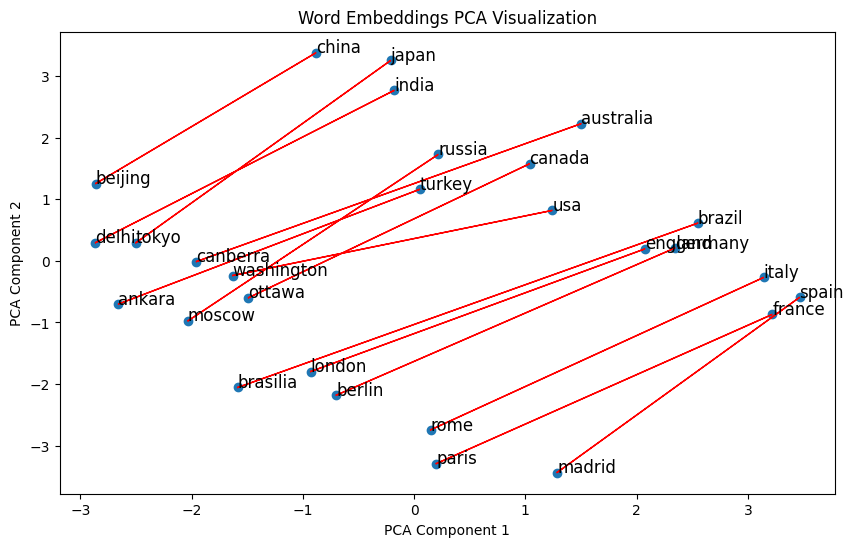

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

vectors = np.array([model[word] for word in words])

# Reduce to 2D using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot the PCA space
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
for i in range(len(words)):
    x, y = reduced_vectors[i]
    plt.text(x, y, words[i], fontsize=12)
    if i%2==0:
        x2, y2 = reduced_vectors[i+1]
        dx = x2 - x
        dy = y2 - y
        plt.arrow(x, y, dx, dy, fc='red', ec='red')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Word Embeddings PCA Visualization")
plt.show()


The plot demonstrates how vector arithmetic works. As all the country-capital pairs have similar vectors, we are able to find the target words by performing arithmetic.

## Review

Word-based, subword-based, and character-based tokenization each require different preprocessing steps and are suited for different NLP tasks. When working on NLP problems, pre-defined rules (e.g., built-in stop word list) and pre-trained models (e.g., word embeddings, subword encoding) can reduce our efforts greatly. We encourage you to explore the documentations of spaCy and Gensim.

For exercises, try the following to reinforce your understanding:
- Load [the corpus](https://s3.amazonaws.com/text-datasets/nietzsche.txt) from Coding Tutorial 7 and apply word-based tokenization. Print the text data after each preprocessing step and observe the results. (Since the corpus is large, consider processing and printing partial data to avoid runtime crashes.)
- Repeat the previous step using subword-based tokenization and compare the results.
- Experiment with vector arithmetic using [these additional examples](http://download.tensorflow.org/data/questions-words.txt). Are the `most_similar` predictions accurate? Do errors decrease when you use larger embeddings, such as `glove.6B.300d.txt`?

For any questions and discussions regarding this tutorial, attend [TA office hours](https://docs.google.com/spreadsheets/d/1fzfTJpEF7RaUYRA_NGa3DkiazdQXVj7QNBbp6DrEZ3I/edit?usp=sharing) or create a post on [Piazza](https://piazza.com/colorado/spring2025/csci5922/home) :) See you in the next tutorial!

\- Everley